# EU PARK FOOD SALES ANALYSIS :
         DATA : EU_park_food_sales

         
         Ahmed Dagash
        

#### 1. Import Python Libraries:

In [1]:
#### 1. Import Python Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

# Optional: Set a professional plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#### 2. Data preprocessing :
#####     - Load datafile : 

In [2]:
food_sales = pd.read_csv("EU_park_food_sales.csv")

In [3]:
food_sales.shape

(1000, 30)

In [4]:
food_sales.columns

Index(['Hamburger', 'Cheeseburger', 'Veggie Burger', 'Hot Dog',
       'Chicken Sandwich', 'Fries', 'Onion Rings', 'Salad', 'Pizza Slice',
       'Nachos', 'Ice Cream', 'Cupcake', 'Cookie', 'Candy', 'Popcorn',
       'Soft Drink', 'Water', 'Juice', 'Coffee', 'Tea', 'Milkshake',
       'Smoothie', 'Beer', 'Wine', 'Cocktail', 'Pretzel', 'Churros',
       'Cotton Candy', 'Corn Dog', 'Tacos'],
      dtype='object')

####      - Data first few lines  :

In [5]:
food_sales.head()

,Hamburger,Cheeseburger,Veggie Burger,Hot Dog,Chicken Sandwich,Fries,Onion Rings,Salad,Pizza Slice,Nachos,...,Milkshake,Smoothie,Beer,Wine,Cocktail,Pretzel,Churros,Cotton Candy,Corn Dog,Tacos
0,1,3,0,0,1,2,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,3,2,0,0,0,2,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,2,3,1,0,1,2,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,3,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2,2,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


##### 1000 row and 30 column

####    - Data types :

In [6]:
food_sales.dtypes

Hamburger           int64
Cheeseburger        int64
Veggie Burger       int64
Hot Dog             int64
Chicken Sandwich    int64
Fries               int64
Onion Rings         int64
Salad               int64
Pizza Slice         int64
Nachos              int64
Ice Cream           int64
Cupcake             int64
Cookie              int64
Candy               int64
Popcorn             int64
Soft Drink          int64
Water               int64
Juice               int64
Coffee              int64
Tea                 int64
Milkshake           int64
Smoothie            int64
Beer                int64
Wine                int64
Cocktail            int64
Pretzel             int64
Churros             int64
Cotton Candy        int64
Corn Dog            int64
Tacos               int64
dtype: object

####  - statistical values of data :

In [7]:
desc = food_sales.describe(include='all')
desc.loc['sum'] = food_sales.select_dtypes(include='number').sum()
desc

,Hamburger,Cheeseburger,Veggie Burger,Hot Dog,Chicken Sandwich,Fries,Onion Rings,Salad,Pizza Slice,Nachos,...,Milkshake,Smoothie,Beer,Wine,Cocktail,Pretzel,Churros,Cotton Candy,Corn Dog,Tacos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.00000,1000.000000,1000.00000
mean,0.619000,0.643000,0.675000,0.204000,0.20800,0.608000,0.205000,0.525000,0.195000,0.604000,...,0.202000,0.221000,0.559000,0.617000,0.627000,0.5860,0.203000,0.13900,0.222000,0.19200
std,0.953283,0.949976,0.953039,0.403171,0.40608,0.946167,0.403904,0.928567,0.396399,0.994068,...,0.401693,0.415128,0.969257,0.955628,0.981241,0.9346,0.402434,0.34612,0.415799,0.39407
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000
75%,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.0000,0.000000,0.00000,0.000000,0.00000
max,3.000000,3.000000,3.000000,1.000000,1.00000,3.000000,1.000000,3.000000,1.000000,3.000000,...,1.000000,1.000000,3.000000,3.000000,3.000000,3.0000,1.000000,1.00000,1.000000,1.00000
sum,619.000000,643.000000,675.000000,204.000000,208.00000,608.000000,205.000000,525.000000,195.000000,604.000000,...,202.000000,221.000000,559.000000,617.000000,627.000000,586.0000,203.000000,139.00000,222.000000,192.00000


#####    Check for missing values :

In [8]:
food_sales.isna().sum()

Hamburger           0
Cheeseburger        0
Veggie Burger       0
Hot Dog             0
Chicken Sandwich    0
Fries               0
Onion Rings         0
Salad               0
Pizza Slice         0
Nachos              0
Ice Cream           0
Cupcake             0
Cookie              0
Candy               0
Popcorn             0
Soft Drink          0
Water               0
Juice               0
Coffee              0
Tea                 0
Milkshake           0
Smoothie            0
Beer                0
Wine                0
Cocktail            0
Pretzel             0
Churros             0
Cotton Candy        0
Corn Dog            0
Tacos               0
dtype: int64

####  check for duplicates :

In [9]:
food_sales.duplicated().sum()


np.int64(0)

###   check for outliers : 

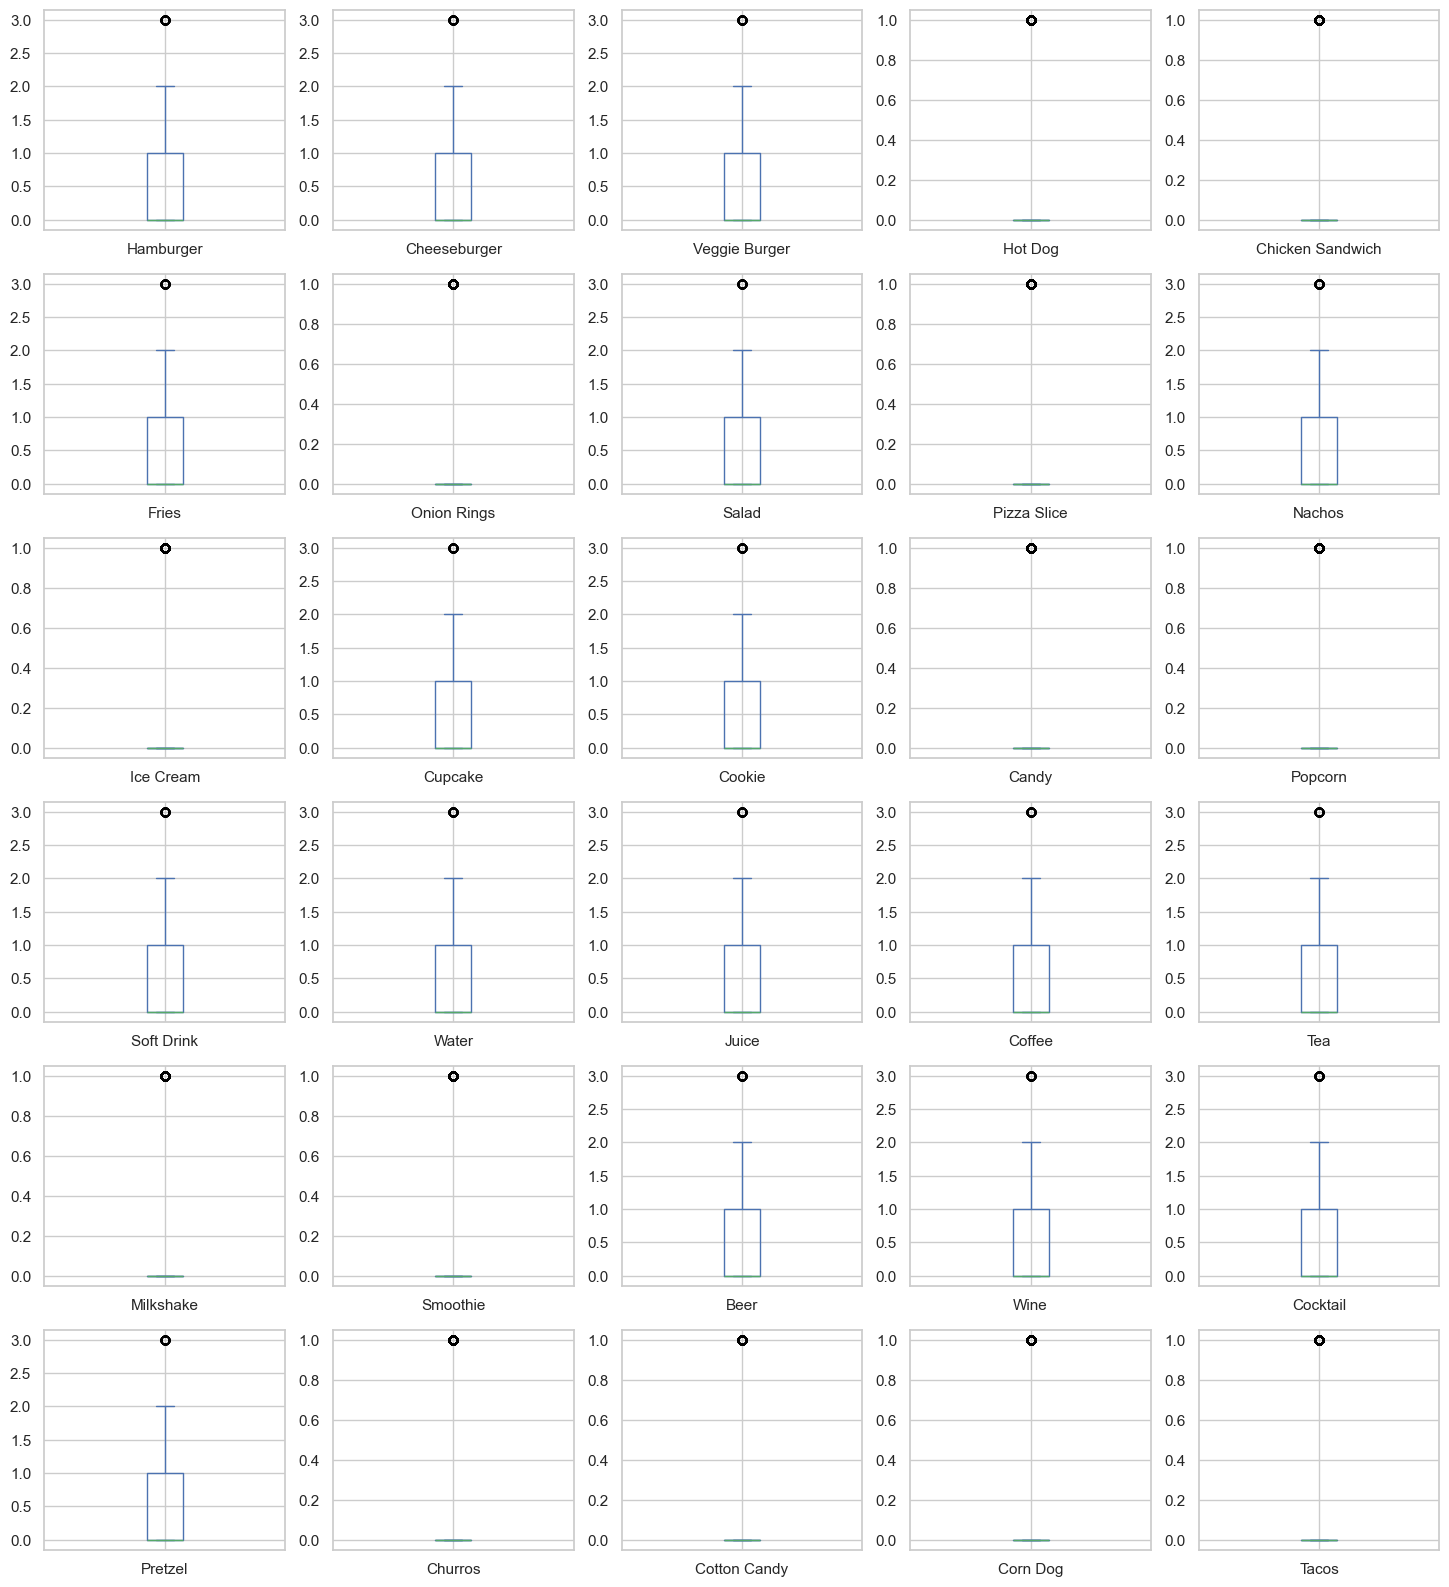

In [10]:
food_sales.plot(kind='box', subplots=True, layout=(6,5), figsize=(18,20), sharex=False, sharey=False)
pyplot.show()

###   - EDA :

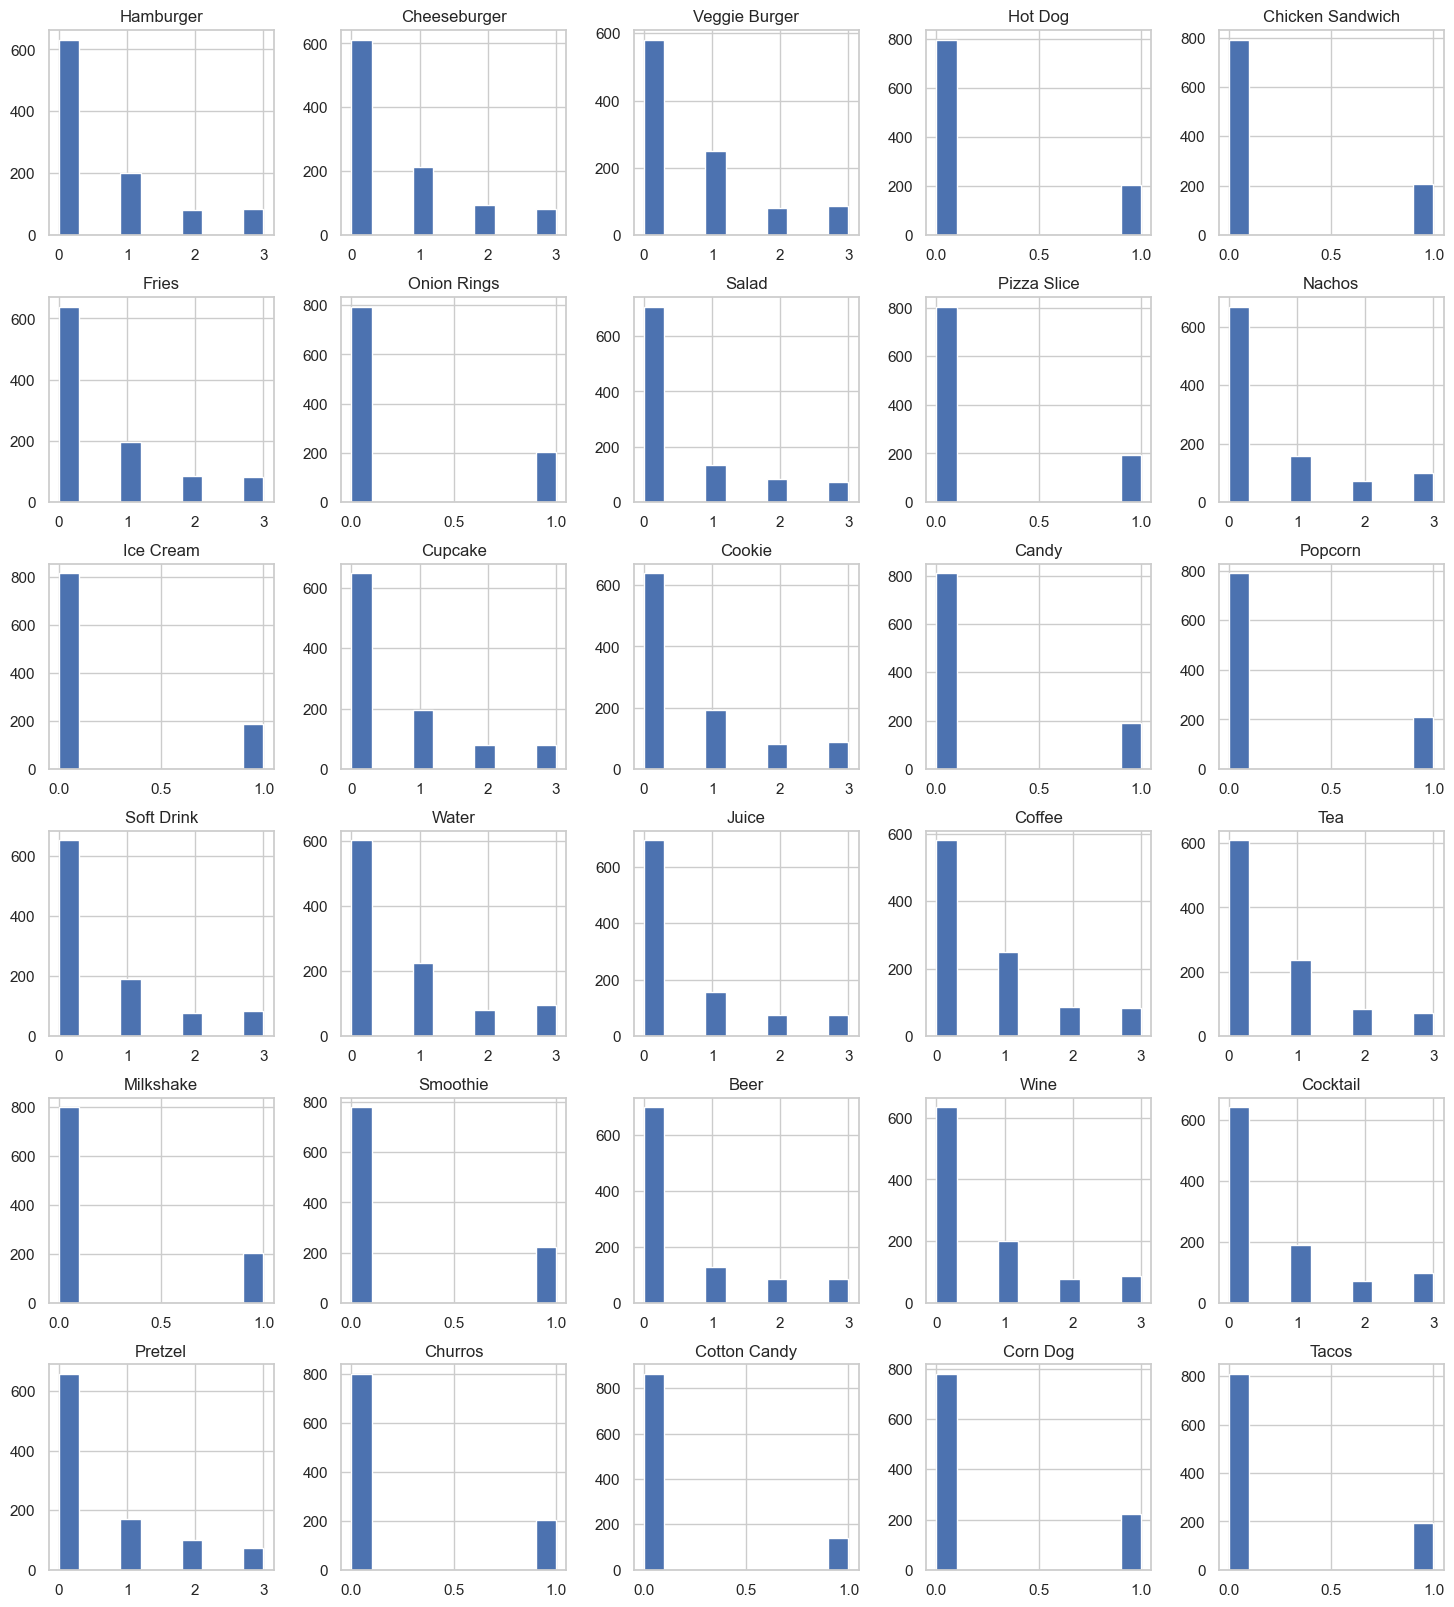

In [11]:
food_sales.hist(figsize=(18,20),layout=(6,5),bins=10)
plt.show()

###     summary:
           - data shape         : (1000 , 30 )
           - data columns       : 30 with different food types
           - data types         : int64
           - data head          : shows purchased quantites from different food types with 1000 transactions 
           - missing values     : non
           - statistical values :
                1. entries   : 1000 transactions
                2. minimun quantity :  0 (not purchased)
                3. maximum quantity : 3
                4. top items        : (Veggie Burger,Cheeseburger ,Hamburger , fries, Nachos ,Fries,  Wine, Cocktail)
                5. there is some bulk purchases .
                6.some items was never purchased in many transactions.
                7. there are simillar patterns in purchasing behavior.

#### 3. Modeling: Finding the Optimal 'k'

To find the right number of clusters (k), I will use two methods:
1.  **The Elbow Method:** This looks for the "elbow" point where adding more clusters doesn't significantly reduce the inertia (within-cluster sum of squares).
2.  **The Davies-Bouldin Index:** This measures cluster separation. A lower score indicates better-defined clusters.

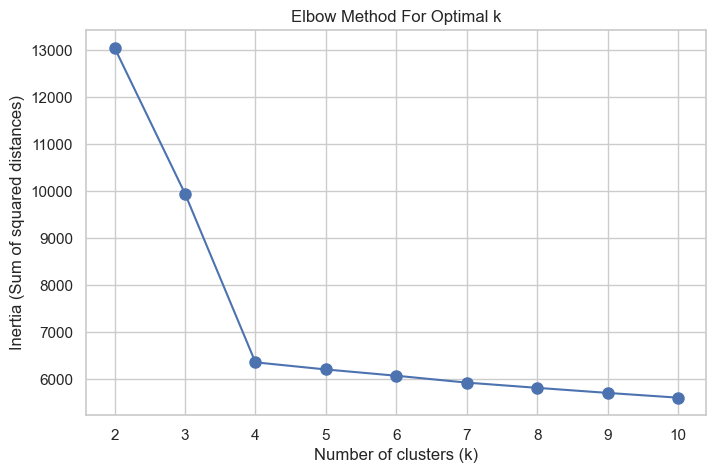

In [12]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(food_sales)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()

####   summary:
     The most prominent "elbow" in the curve appears to be at k=4.

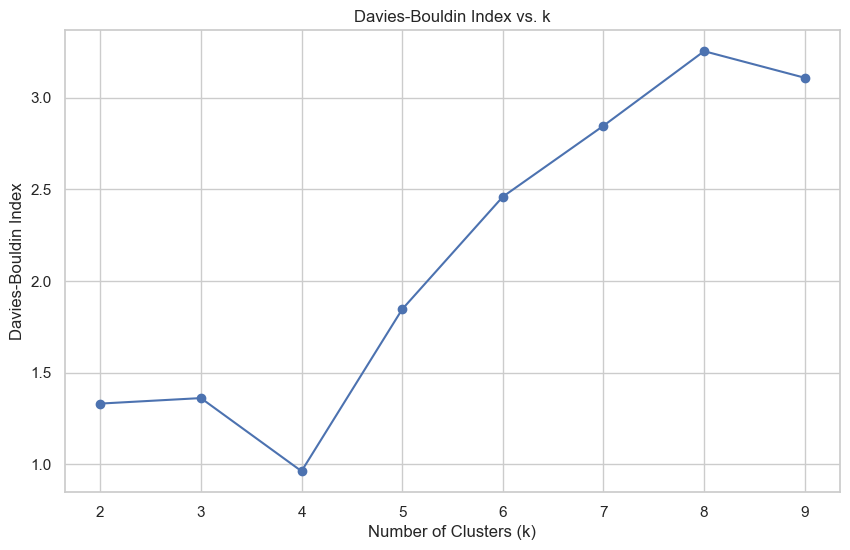

In [13]:
from sklearn.metrics import davies_bouldin_score

dbi_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=18)
    labels = kmeans.fit_predict(food_sales)
    dbi = davies_bouldin_score(food_sales, labels)
    dbi_scores.append(dbi)

# Plot
import matplotlib.pyplot as plt

plt.plot(k_range, dbi_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. k')
plt.grid(True)
plt.show()

####         summary:

             the minimum point on the curve at k=4.

#####  Run Kmean   k = 4

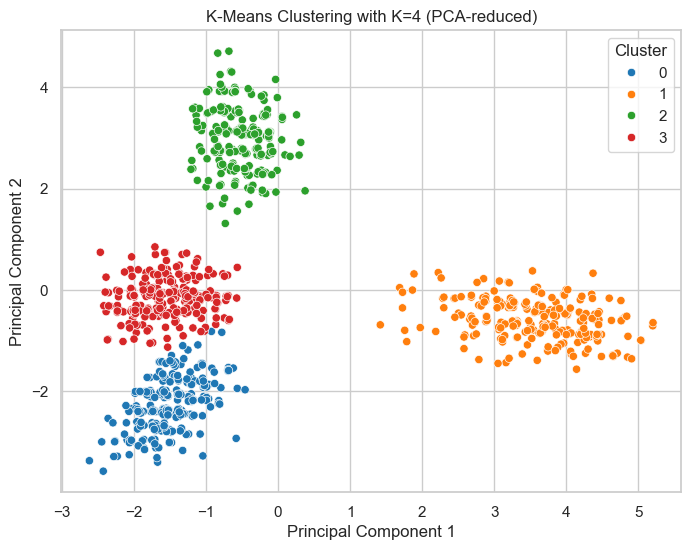

In [14]:
# 1. Run KMeans with optimal k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(food_sales)  # Make sure you use the scaled data

# 2. Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(food_sales)

# 3. Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# 4. Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('K-Means Clustering with K=4 (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#####      summary :
           The data is clustered into 4 groups.

           Visually, this appears more structured than the k=3 case.

#### Run Kmean  k = 5

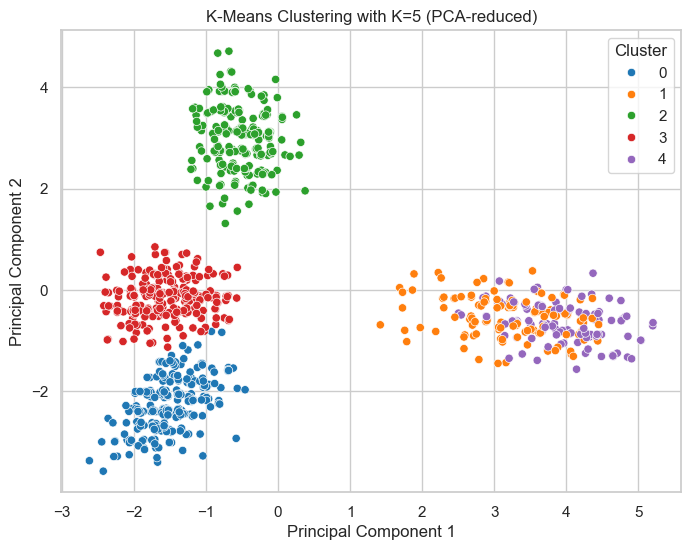

In [15]:
# 1. Run KMeans with optimal k = 4
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(food_sales)  # Make sure you use the scaled data

# 2. Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(food_sales)

# 3. Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# 4. Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('K-Means Clustering with K=5 (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

##### summary : 
       Divides the data into 5 clusters.

       One or more clusters may be too small or too close to others, leading to a slight decrease in silhouette score.
       This suggests over-clustering

#### Run Kmean  k = 3

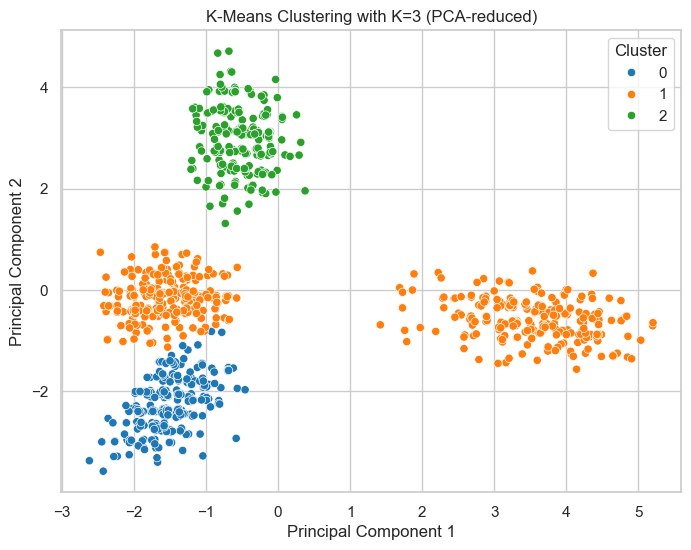

In [16]:
# 1. Run KMeans with optimal k = 4
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(food_sales)  # Make sure you use the scaled data

# 2. Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(food_sales)

# 3. Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# 4. Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('K-Means Clustering with K=3 (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#####  sumarry :
      The data is divided into 3 clusters, visualized in red, green, and blue.
      Some clusters are compact and well-separated, but others seem overlapping or elongated.

#### Evaluate results 

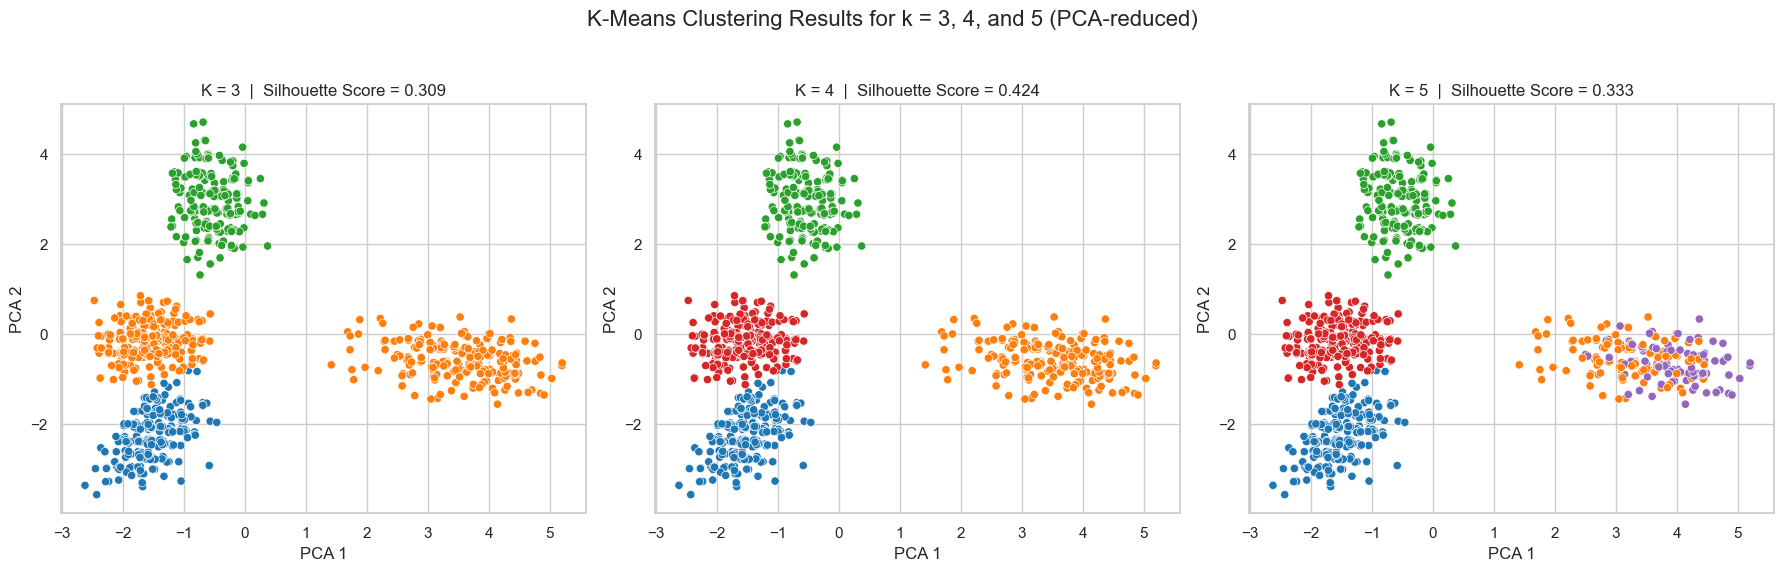

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Prepare PCA data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(food_sales)

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ks = [3, 4, 5]

for i, k in enumerate(ks):
    # Run KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(food_sales)
    
    # Calculate silhouette score
    sil_score = silhouette_score(food_sales, clusters)
    
    # Create DataFrame for plotting
    pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    pca_df['Cluster'] = clusters

    # Plot
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', ax=axes[i], legend=False)
    axes[i].set_title(f'K = {k}  |  Silhouette Score = {sil_score:.3f}')
    axes[i].set_xlabel('PCA 1')
    axes[i].set_ylabel('PCA 2')
    axes[i].grid(True)

# Set overall title
plt.suptitle("K-Means Clustering Results for k = 3, 4, and 5 (PCA-reduced)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#####  summary : 
        K-Means (k=3) , Silhouette Score: 0.309
        K-Means (k=4) , Silhouette Score: 0.424
        K-Means (k=4) , Silhouette Score: 0.333
        Here, k=4 (score: 0.262) gives the best clustering performance among the three options

#### key findings :

###### Assign Clusters to the Original Data :

In [18]:
from sklearn.cluster import KMeans

# Run KMeans on scaled data
kmeans_4 = KMeans(n_clusters=4, random_state=42)
cluster_labels_4 = kmeans_4.fit_predict(food_sales)

# Assign cluster labels to original (unscaled) data for interpretation
grouped_df = food_sales.copy()  # assuming this is the unscaled data
grouped_df['Cluster'] = cluster_labels_4


##### Group by Cluster and Analyze Mean Purchase Behavior

In [19]:
# Group by cluster and calculate mean
cluster_summary = grouped_df.groupby('Cluster').mean()

# Show top items for each cluster
for cluster_num in cluster_summary.index:
    print(f"\nTop items for Cluster {cluster_num}:")
    top_items = cluster_summary.loc[cluster_num].sort_values(ascending=False).head(4)
    print(top_items)



Top items for Cluster 0:
Water            2.084
Veggie Burger    2.024
Salad            1.928
Juice            1.900
Name: 0, dtype: float64

Top items for Cluster 1:
Nachos      2.092
Cocktail    2.068
Beer        2.036
Wine        2.004
Name: 1, dtype: float64

Top items for Cluster 2:
Cheeseburger    2.020
Hamburger       2.004
Fries           1.988
Soft Drink      1.976
Name: 2, dtype: float64

Top items for Cluster 3:
Cookie     2.032
Coffee     2.020
Cupcake    1.940
Tea        1.900
Name: 3, dtype: float64


##### Label Each Cluster Based on Top Items

In [20]:
cluster_labels = {
    0: 'Fast Food',
    1: 'Snacks & Drinks',
    2: 'Health food ',
    3: 'Coffee & Cookie'
}

# Add names to the grouped dataframe
grouped_df['Segment'] = grouped_df['Cluster'].map(cluster_labels)


#####    Count Number of Customers per Cluster

In [21]:
group_counts = grouped_df['Segment'].value_counts()
print(group_counts)


Segment
Health food        250
Fast Food          250
Coffee & Cookie    250
Snacks & Drinks    250
Name: count, dtype: int64


In [22]:
# Sort each cluster's items to see the top preferences
top_items_summary = cluster_summary.apply(
    lambda x: x.sort_values(ascending=False).head(4).index.tolist(), 
    axis=1
).to_frame(name='Top 4 Items')

# Add the segment names
top_items_summary['Segment'] = top_items_summary.index.map(cluster_labels)

# Display the final summary table
display(top_items_summary[['Segment', 'Top 4 Items']])

,Segment,Top 4 Items
Cluster,,
0,Fast Food,"[Water, Veggie Burger, Salad, Juice]"
1,Snacks & Drinks,"[Nachos, Cocktail, Beer, Wine]"
2,Health food,"[Cheeseburger, Hamburger, Fries, Soft Drink]"
3,Coffee & Cookie,"[Cookie, Coffee, Cupcake, Tea]"


#### summary :
      " there are 4 distinct food categories: Health Food, Fast Food, Coffee & Cookie, and Snacks & Drinks."